In [1]:
!pip install shap
!pip install transformers

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491639 sha256=2853e112528a6ba333d56eac0e897e3942fd50cfb2baa22dcc703ed4ecc6c157
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
     |████████████████████████████████| 2.6 MB 4.0 MB/s 
     |████████████████████████████████| 3.3 MB 23.7 MB/s 
     |████████████████████████████████| 636 kB 20.6 MB/s 
     |████████████████████████████████| 895 kB 31.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/MyDrive/xAI for Social Bias


In [ ]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[0]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [ ]:
def sort_di(dict_name):
  keylist={k: v for k, v in sorted(dict_name.items(), key=lambda item: item[1], reverse=True)}
  print(keylist)
  return keylist

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import transformers
import shap
import scipy as sp
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
MODEL='cardiffnlp/twitter-roberta-base-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#tokenizer = AutoTokenizer.from_pretrained(MODEL)
class_ = transformers.pipeline('sentiment-analysis', return_all_scores=True)

In [ ]:
classifier = transformers.pipeline('sentiment-analysis', model=model, tokenizer=class_.tokenizer ,return_all_scores=True)

In [ ]:
import string 

def produce_explanation_features(g_list,sentiment):
  #explainer = shap.Explainer(classifier)
  #shap_values = explainer(g_list[:])
  text="sep "+g_list[0]+" cls "
  
  for i in g_list[1:]:
    text+=i.lower()+" "
  words=[]
  x=classifier.tokenizer(text)
  
  for i in x['input_ids']:
    n=classifier.tokenizer.decode(i)
    if n not in words:
      words.append(n)

  print(words)
  words.remove("sep")
  words.remove("cl")
  words.remove("[SEP]")
  words = ['[SEP]' if word == '##s' else word for word in words]
  
  feature_names=words
  vals=shap_values[:,:,sentiment].mean(0).values
  print(len(feature_names))
  print(len(vals))
  dictionary = dict(zip(feature_names, vals))
  dictionary = sort_di(dictionary)
  return dictionary

In [4]:
masculine=['he', 'man','boy','brother','son', 'husband', 'boyfriend', 'father', 'him']
feminine=['she','woman','girl','sister','daughter','wife','girlfriend','mother', 'her']
neutral=['they', 'person', 'child', 'child', 'sibling', 'spouse', 'partner', 'parent', 'them']

In [15]:
#Anger
fe_dict={'di': 1.6022011022400087, '##sp': 1.1094975333573922, 'makes': 0.8362447935860129, 'an': 0.3287645888578414, 'outrageous': 0.31942955039981585, '##lea': 0.19226414978810483, '##sing': 0.19226414978810483, 'in': 0.1738251280963458, 'annoyed': 0.16526671786621638, 'was': 0.14928204825469032, 'conversation': 0.12978935105827732, 'anger': 0.1187861462613905, 'a': 0.09676804800359702, 'situation': 0.07639823496038692, 'the': 0.07538248656383191, 'my': 0.05057235083398331, 'with': 0.04843760636673331, 'irritating': 0.04049278513322609, 'feels': 0.01987462156679805, 'told': 0.016229381275510168, 'her': 0.006725789379514406, 'daughter': 0.005792060928293407, 'recent': 0.0005810364512949737, '[CLS]': 1.3790558598382525e-08, '[SEP]': -5.173982231136575e-08, 'us': -0.0026955296568347263, 'girl': -0.009861920657633472, 'girlfriend': -0.020347598682742336, 'irritated': -0.038882472548994435, 'events': -0.04817473855576739, 'furious': -0.054449220746574954, '##xing': -0.06882903572851125, 'annoying': -0.07169904412819678, 'wife': -0.07751765831825487, 'herself': -0.0791345165373897, 'woman': -0.08453839675995053, 've': -0.09250254138185342, 'enraged': -0.1044527787155062, 'this': -0.10545137420476045, 'about': -0.10836761988545256, 'all': -0.11880980141603499, 'found': -0.15202654568800805, 'she': -0.17341337330198675, 'i': -0.25939126867421525, 'feel': -0.2961836874673191, 'sister': -0.3003547562822458, 'made': -0.4334452107646711, 'mother': -0.5184965202208728, 'me': -0.9955902007256003}
mas_dict={'di': 1.6224026273176972, '##sp': 1.1319092335732073, 'makes': 0.8202287288390748, 'outrageous': 0.28345519311982653, 'was': 0.23552259220166727, 'son': 0.2099326332982936, '##lea': 0.2077007610411035, '##sing': 0.2077007610411035, 'an': 0.18870402331134803, 'father': 0.16882941438626056, 'annoyed': 0.15513083371101968, 'conversation': 0.12837393581603415, 'my': 0.11099516601829845, 'in': 0.09360443726090387, 'him': 0.07474763673098729, 'the': 0.06756031184679537, 'anger': 0.06344727648441613, 'boyfriend': 0.058968924765889226, 'with': 0.05551010403392599, 'a': 0.05454236571695839, 'himself': 0.039518110218853986, 'man': 0.03699981146326746, 'told': 0.036878912424112995, 'situation': 0.028513325305090785, 'us': 0.004747283722045276, 'recent': 0.004571958535984001, '[CLS]': 3.289109002912916e-08, '[SEP]': -6.628328294814539e-09, 'husband': -0.004834948003452368, 'events': -0.048737124758016934, 'irritating': -0.05024992976261523, 'he': -0.05573278928083336, 'found': -0.05924353916744248, 'this': -0.06212371792426679, 'irritated': -0.07170544875003183, 'boy': -0.07310294072274562, 'furious': -0.07890770710785569, 'feels': -0.09740486903065348, '##xing': -0.11516723163850441, 'about': -0.11780906217020135, 'enraged': -0.11853881857197644, 'annoying': -0.1211479666128709, 've': -0.12650454088980925, 'all': -0.1335855847493616, 'brother': -0.1413519198476538, 'feel': -0.3237726350721219, 'i': -0.3260112328911202, 'made': -0.4487120727239411, 'me': -0.9062408566806276}
neu_dict={'di': 1.6593123526670759, '##sp': 1.164476697690021, 'makes': 0.8100487761662588, 'an': 0.38435853474956944, 'outrageous': 0.2652698890092861, '##lea': 0.2237404290824189, '##sing': 0.2237404290824189, 'in': 0.19153788403037456, 'annoyed': 0.17524803525083799, 'was': 0.15029290727391142, 'conversation': 0.13354997130049454, 'anger': 0.12984441461495896, 'a': 0.11487927750445802, 'my': 0.10676129428081543, 'situation': 0.09007564350281809, 'the': 0.08660614268969198, 'they': 0.08261203097391726, 'sibling': 0.07436339124988171, 'with': 0.0643162218514014, 'them': 0.06039012464265749, 'told': 0.02173716311901758, 'irritating': 0.010899391670306726, 'child': 0.009795842663518056, 'recent': 0.007392054131840786, 'spouse': 0.004897386736964626, 'us': 0.003541238227656879, 'themselves': 0.002114150486737334, '[CLS]': 1.5231839554471554e-08, '[SEP]': -3.4353391270434564e-08, 'partner': -0.03456064294022898, 'irritated': -0.03569607513350009, 'events': -0.043590711211056024, 'parent': -0.04595330507065232, 'found': -0.061852097748870946, 'annoying': -0.07613113737004146, 'feels': -0.07932495177672858, '##xing': -0.08347431567549984, 'about': -0.09394036474880023, 'enraged': -0.09505175877214753, 've': -0.10027427897010711, 'all': -0.11136855471548539, 'furious': -0.11243399889797845, 'this': -0.11392814980579691, 'person': -0.23622777461425173, 'i': -0.24871842279485304, 'feel': -0.3284657596705076, 'made': -0.454996723140684, 'me': -1.0956065668407018}

mean=0
for i in feminine:
  print(i, ' ', round(fe_dict[i], 5))
  mean+=fe_dict[i]
print("MEAN: ", mean/len(fe_dict) ,'\n')
mean=0
for i in masculine:
  print(i, ' ', round(mas_dict[i], 5))
  mean+=mas_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')
mean=0
for i in neutral:
  print(i, ' ', round(neu_dict[i], 5))
  mean+=neu_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')

she   -0.17341
woman   -0.08454
girl   -0.00986
sister   -0.30035
daughter   0.00579
wife   -0.07752
girlfriend   -0.02035
mother   -0.5185
her   0.00673
MEAN:  -0.023918619875834254 

he   -0.05573
man   0.037
boy   -0.0731
brother   -0.14135
son   0.20993
husband   -0.00483
boyfriend   0.05897
father   0.16883
him   0.07475
MEAN:  0.005717829641458605 

they   0.08261
person   -0.23623
child   0.0098
child   0.0098
sibling   0.07436
spouse   0.0049
partner   -0.03456
parent   -0.04595
them   0.06039
MEAN:  -0.0015601479936390803 



In [16]:
#Joy
neu_dict={'me': 1.0039454313344125, 'made': 0.36824947225953003, 'i': 0.3078812334588395, 'relieved': 0.18120087935498386, '##static': 0.11645421694321367, 'wonderful': 0.11326973326962915, 'feel': 0.1088459193556975, 'great': 0.10865863457123746, 'person': 0.060953700228218645, 'amazing': 0.056352597782292825, 'them': 0.04090830812410609, 'found': 0.025737204639262178, 'us': 0.007116604565506071, 'this': 0.006048615252064077, 'themselves': 0.0022414937062815838, 'with': 0.0005912199066354651, '[SEP]': 1.3963003266977732e-07, '[CLS]': -5.481993759183215e-08, 'situation': -0.0029846693362659002, 'sibling': -0.006109720326523481, 'feels': -0.011940115541376427, 'events': -0.015257416571694191, 'told': -0.028219363494704157, 'happy': -0.042857301821653475, 'hilarious': -0.046400726279179794, 'partner': -0.061188199453964615, 'all': -0.07076275514868857, 'parent': -0.08383319638983087, 'conversation': -0.0859450957124662, 'about': -0.08616203818474069, 'funny': -0.09069123859586294, 'the': -0.0986619675893877, 'my': -0.10157998871313906, 'child': -0.10303281950921057, 'spouse': -0.11133290186968638, 'recent': -0.12893860611508223, 'an': -0.15456770420665392, 'a': -0.16356469569205223, 'glad': -0.1685481169191182, 'was': -0.18328567348070404, 'ec': -0.21167986163603555, 'excited': -0.21318761033681422, 'they': -0.22818544147121486, 'in': -0.24804926156780382, 'makes': -0.3196487260302855}
mas_dict={'me': 0.8276261878066263, 'made': 0.3700562557656531, 'i': 0.3377924338280849, 'relieved': 0.19459688031497135, 'great': 0.1606929504134871, 'wonderful': 0.13393044353948172, 'feel': 0.11536864318207864, '##static': 0.10755185648065019, 'he': 0.10332991318182949, 'amazing': 0.09677931247223139, 'man': 0.09497272992460633, 'boy': 0.044184040028469, 'found': 0.039249278352072536, 'this': 0.028765913855927774, 'us': 0.015961117355629724, 'him': 0.009298258905615182, 'situation': 0.001352740260696651, '[SEP]': 1.2464431769958553e-07, '[CLS]': -6.66414938795238e-08, 'told': -0.0012696909095756825, 'events': -0.003905966273629352, 'husband': -0.009791281022556726, 'happy': -0.011149651492154614, 'with': -0.016812095236436758, 'hilarious': -0.028613851290205133, 'himself': -0.029038029664227978, 'feels': -0.0377495797741515, 'all': -0.05379010404467299, 'funny': -0.06772470131593973, 'an': -0.07798787221825426, 'a': -0.08068436518055307, 'about': -0.08138160775363576, 'boyfriend': -0.08810308273464658, 'conversation': -0.08928423884727961, 'the': -0.09642242170092638, 'brother': -0.10258380616016377, 'my': -0.10800494147337665, 'in': -0.10924775608166648, 'recent': -0.13725865458716616, 'glad': -0.14462093157697142, 'son': -0.1571237080377697, 'excited': -0.19276862931912314, 'was': -0.19634884763567478, 'father': -0.20517832697481544, 'ec': -0.20576565483370599, 'makes': -0.32641826704569044}
fe_dict={'me': 0.8574203094378177, 'mother': 0.5365497236677144, 'made': 0.33180387981792514, 'i': 0.3101139305793227, 'relieved': 0.15357177765518099, 'feel': 0.11518727011261744, 'wonderful': 0.08210145091381159, 'great': 0.08125267230554768, 'she': 0.0771050919755682, '##static': 0.0613168208136461, 'wife': 0.04334878609600829, 'amazing': 0.03673488193546492, 'us': 0.03150844202265676, 'told': 0.026007404861380888, 'found': 0.01623671338659958, 'girl': 0.014035196882988635, 'daughter': 0.00827492205829861, 'sister': 0.00012899821838321073, '[SEP]': 1.1198490089879356e-07, '[CLS]': -6.195461831803465e-08, 'herself': -0.0029550574148530934, 'with': -0.013002488490682964, 'situation': -0.014415157079877788, 'events': -0.021819028521067266, 'her': -0.02671552387823295, 'woman': -0.032671610211772006, 'this': -0.04207512066600043, 'my': -0.04221889009781558, 'all': -0.052774586461670756, 'hilarious': -0.05752698086033494, 'happy': -0.06014317046762903, 'conversation': -0.0654326796181727, 'about': -0.0702661095480659, 'feels': -0.07877998304812518, 'girlfriend': -0.08100655357452916, 'funny': -0.08635630264528911, 'the': -0.09548495822810879, 'recent': -0.12019912051722881, 'a': -0.13096001535314705, 'an': -0.14169182044626327, 'was': -0.17468189663752773, 'glad': -0.20795915453077127, 'in': -0.21879121679804658, 'excited': -0.2387771965605568, 'ec': -0.2435084160208642, 'makes': -0.37649962903160406}

mean=0
for i in feminine:
  print(i, ' ', round(fe_dict[i], 5))
  mean+=fe_dict[i]
print("MEAN: ", mean/len(fe_dict) ,'\n')
mean=0
for i in masculine:
  print(i, ' ', round(mas_dict[i], 5))
  mean+=mas_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')
mean=0
for i in neutral:
  print(i, ' ', round(neu_dict[i], 5))
  mean+=neu_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')

she   0.07711
woman   -0.03267
girl   0.01404
sister   0.00013
daughter   0.00827
wife   0.04335
girlfriend   -0.08101
mother   0.53655
her   -0.02672
MEAN:  0.011718457200748416 

he   0.10333
man   0.09497
boy   0.04418
brother   -0.10258
son   -0.15712
husband   -0.00979
boyfriend   -0.0881
father   -0.20518
him   0.0093
MEAN:  -0.006911005841987383 

they   -0.22819
person   0.06095
child   -0.10303
child   -0.10303
sibling   -0.00611
spouse   -0.11133
partner   -0.06119
parent   -0.08383
them   0.04091
MEAN:  -0.013218957559495923 



In [17]:
#Fear
fe_dict={'makes': 0.8410179271917265, 'in': 0.27949695565953725, 'a': 0.20657017189719742, 'was': 0.20288187979766628, 'conversation': 0.13199881183252526, 'discouraged': 0.11649241398401146, 'fearful': 0.07354313850521049, 'dreadful': 0.06840293646817204, 'the': 0.05991970398759514, 'threatening': 0.05771939029467821, 'my': 0.05671373040256575, 'with': 0.056113079776686656, 'feels': 0.039154683337748034, 'situation': 0.037664197159041325, 'us': 0.020863900920404646, 'told': 0.020703369806458326, 'her': 0.016672491463295806, '[CLS]': 3.833640703845842e-08, '[SEP]': -4.78550414448331e-08, 'daughter': -0.007868401297281016, 'herself': -0.01024785149887548, 'recent': -0.01285497890839612, 'found': -0.014302636861540532, 'anxious': -0.014538236202858356, 'girl': -0.02122515665742291, 'events': -0.024438160280468225, 'horrible': -0.02948959911947463, 'girlfriend': -0.0316501561214502, 'terrifying': -0.05646639928994945, 'woman': -0.056673674463690205, 'shocking': -0.08455290419240998, 'wife': -0.08800011264311726, 'this': -0.10599256687532899, 'terrified': -0.13242372732658902, 'scared': -0.1530100444415647, 'about': -0.16390327553541656, 'all': -0.17274977679160086, 'she': -0.17393235774899563, 'i': -0.23322109749014422, 'feel': -0.3665292158173533, 'sister': -0.38833445650041987, 'made': -0.40659066694624535, 'mother': -0.5655678163259811, 'me': -1.0476838964219533}
mas_dict={'makes': 0.8571529721252802, 'was': 0.23081669704181276, 'son': 0.20021339345936712, 'conversation': 0.1450860227977022, 'my': 0.11933625504192802, 'himself': 0.11591258929287558, 'father': 0.10781263470924109, 'told': 0.0630255835723561, 'the': 0.062108369767745024, 'in': 0.06201989045751203, 'a': 0.06177546938869642, 'him': 0.06124451264397796, 'discouraged': 0.048539811747603016, 'with': 0.04747106358373304, 'man': 0.04061951857956155, 'fearful': 0.03877682061132011, 'boyfriend': 0.03163471186807309, 'found': 0.030355294518161446, 'dreadful': 0.027192239996060297, 'threatening': 0.021710835659112915, 'us': 0.016823604912435914, 'situation': 0.002093094659442682, '[CLS]': 4.4643616519342485e-08, '[SEP]': -1.7523519316561422e-08, 'recent': -0.01062767982728439, 'events': -0.03150908404357057, 'husband': -0.036705773220270466, 'he': -0.04519927549171353, 'terrifying': -0.04707898875536689, 'horrible': -0.04989470944198513, 'feels': -0.056730038347571024, 'anxious': -0.059571080759382666, 'this': -0.07610747349050884, 'boy': -0.0786560284265158, 'brother': -0.13270793510998852, 'terrified': -0.13353759219379022, 'shocking': -0.1373859803726993, 'about': -0.18070588357344772, 'scared': -0.19700569475748309, 'all': -0.20658665552080074, 'i': -0.28664376360384897, 'feel': -0.39007332187671473, 'made': -0.3981671307180414, 'me': -0.9614207301262179}
neu_dict={'makes': 0.8255425388400702, 'in': 0.2765896149740909, 'a': 0.1811916783511426, 'was': 0.162016873441226, 'conversation': 0.15751470606107104, 'my': 0.12081392352828686, 'discouraged': 0.10016047005155, 'fearful': 0.09054986862420843, 'the': 0.07470923270524839, 'sibling': 0.062204512332630926, 'situation': 0.049052949514495965, 'dreadful': 0.048113671253484834, 'with': 0.04701263848471809, 'threatening': 0.04696960656530702, 'they': 0.04156978220110188, 'told': 0.03413578326074361, 'us': 0.01992467275594374, 'them': 0.018334521473971743, 'child': 0.01663513399921807, 'themselves': 0.01316105600427923, 'found': 0.005343340318606772, '[CLS]': 4.7020634311267e-08, '[SEP]': -6.699244795214745e-08, 'spouse': -0.012646087871738996, 'recent': -0.0159754252800044, 'anxious': -0.018897859993908923, 'events': -0.018921549258323216, 'horrible': -0.024190635037837516, 'feels': -0.03330635138831221, 'parent': -0.06179748881200047, 'terrifying': -0.0634190633889683, 'partner': -0.06752332611284768, 'shocking': -0.09603322617864496, 'this': -0.11237166892297866, 'scared': -0.13525131314303893, 'about': -0.1427861519568447, 'terrified': -0.14550191151978303, 'all': -0.15532022341554977, 'i': -0.22547808664109398, 'person': -0.2265281411897741, 'feel': -0.4040467897122716, 'made': -0.4335420666389411, 'me': -1.137314947754474}

mean=0
for i in feminine:
  print(i, ' ', round(fe_dict[i], 5))
  mean+=fe_dict[i]
print("MEAN: ", mean/len(fe_dict) ,'\n')
mean=0
for i in masculine:
  print(i, ' ', round(mas_dict[i], 5))
  mean+=mas_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')
mean=0
for i in neutral:
  print(i, ' ', round(neu_dict[i], 5))
  mean+=neu_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')

she   -0.17393
woman   -0.05667
girl   -0.02123
sister   -0.38833
daughter   -0.00787
wife   -0.088
girlfriend   -0.03165
mother   -0.56557
her   0.01667
MEAN:  -0.029922264552160512 

he   -0.0452
man   0.04062
boy   -0.07866
brother   -0.13271
son   0.20021
husband   -0.03671
boyfriend   0.03163
father   0.10781
him   0.06124
MEAN:  0.003447808349110058 

they   0.04157
person   -0.22653
child   0.01664
child   0.01664
sibling   0.0622
spouse   -0.01265
partner   -0.06752
parent   -0.0618
them   0.01833
MEAN:  -0.004956185115819084 



In [18]:
#Sadness
fe_dict={'makes': 0.8183575583431206, 'devastated': 0.41271000229966076, 'in': 0.1916620487945407, 'conversation': 0.16511569473602758, 'a': 0.13343289763749477, 'miserable': 0.12401909537855982, 'was': 0.12185089775758254, 'the': 0.0722338481148272, 'with': 0.05415590475430192, 'my': 0.05071882928606818, 'situation': 0.04773982719526426, 'de': 0.04126084264733302, 'sad': 0.03325728386446266, '##pressing': 0.031564525365904005, 'told': 0.02984353559853209, 'us': 0.01798741982163529, 'her': 0.015907944264358192, 'gloom': 0.01393141070269255, 'found': 0.005233977806040083, 'feels': 0.0005214293698590222, '[CLS]': 7.082518705443202e-10, '[SEP]': -6.264159289436672e-08, 'grim': -0.0015754692299320687, 'herself': -0.0051002635374391035, '##y': -0.01597173263085551, 'daughter': -0.02161368759502942, 'recent': -0.025774369750189347, 'girl': -0.030172562012357698, 'girlfriend': -0.03050849457047185, '##ing': -0.040555966386628166, 'heartbreak': -0.046309391319564214, 'woman': -0.07533977711513734, 'wife': -0.07957558292171618, 'this': -0.09409146022070329, 'events': -0.09464642646748887, 'about': -0.11963280525309417, 'depressed': -0.129901191475893, 'serious': -0.13317767821513904, 'all': -0.13953675185727119, 'she': -0.1516429672074934, 'i': -0.2207902347742056, 'feel': -0.3022534687341189, 'sister': -0.3445400415155835, 'disappointed': -0.3743885483555196, 'made': -0.4451507214908365, 'mother': -0.5568090487138238, 'me': -1.043978672090242}
mas_dict={'makes': 0.8140821505954386, 'devastated': 0.46979914611267665, 'son': 0.21078886717627965, 'was': 0.19826062624413035, 'conversation': 0.16128477372796582, 'my': 0.11384661087081335, 'father': 0.10297492452846022, 'miserable': 0.08703907490424082, 'himself': 0.07082175980311904, 'boyfriend': 0.0666043015725526, 'the': 0.0644874681140239, 'with': 0.05414733655039757, 'told': 0.049679515002495504, 'him': 0.04831121535314935, 'found': 0.041623311854280164, 'us': 0.03031240966114243, 'in': 0.028226981859011645, 'de': 0.024781002606922686, 'man': 0.02059415419647303, '##pressing': 0.01633129906120623, 'a': 0.00753985768489778, '[CLS]': 7.53451301855176e-09, '[SEP]': -6.426789549409832e-08, 'situation': -0.002412937446593883, 'sad': -0.005279954214566566, 'recent': -0.02713077992139127, 'gloom': -0.031375801372147016, 'husband': -0.040726337413295455, '##y': -0.04787140816186819, 'grim': -0.053314123067164654, 'he': -0.05833184532469815, 'this': -0.05967409992579041, 'feels': -0.06136142998449642, 'boy': -0.06936921617994862, '##ing': -0.0786079981816629, 'heartbreak': -0.0833964420623461, 'events': -0.09958334785780731, 'about': -0.12638295528024707, 'depressed': -0.14237403454139555, 'brother': -0.14448134854653422, 'all': -0.14901352856267935, 'serious': -0.18148271082681786, 'i': -0.29494289627824777, 'feel': -0.3510343903093511, 'disappointed': -0.38432465473201777, 'made': -0.44574569387915375, 'me': -0.951474495810135}
neu_dict={'makes': 0.7802495493200257, 'devastated': 0.37396827547081557, 'in': 0.18943353883488837, 'conversation': 0.15861419736094295, 'was': 0.13155017786898188, 'a': 0.13030997311229736, 'miserable': 0.12930028899694068, 'my': 0.11106728313978506, 'the': 0.08085983080845054, 'de': 0.06400151548782973, 'they': 0.05956399527692283, 'with': 0.0516571931881414, 'them': 0.05052147818119366, 'sibling': 0.05016421027977072, 'situation': 0.049437917682472604, '##pressing': 0.0434629924696243, 'told': 0.035019733487445914, 'themselves': 0.021417979809789406, 'us': 0.019987131798118757, 'sad': 0.009574082324926302, 'found': 0.007946426577991548, 'child': 0.0071093875382987936, 'gloom': 0.001512708152965681, '[CLS]': 1.1620451225277265e-08, '[SEP]': -8.444291019363678e-08, 'recent': -0.01181743943662578, 'spouse': -0.014131731407662822, '##y': -0.014481222480105633, 'grim': -0.032255864440482306, '##ing': -0.06248797748483955, 'heartbreak': -0.06394045021712359, 'parent': -0.07116490014280452, 'partner': -0.07555977816798513, 'events': -0.09167218846265264, 'this': -0.09382060012467718, 'feels': -0.09645482992761081, 'about': -0.10517732236879684, 'depressed': -0.11989099853744334, 'all': -0.12832118801311612, 'serious': -0.16100431832660797, 'person': -0.21884185063309824, 'i': -0.23821297365335115, 'feel': -0.34778448248160165, 'disappointed': -0.4063542498613029, 'made': -0.47895881309007643, 'me': -1.111964198205163}

mean=0
for i in feminine:
  print(i, ' ', round(fe_dict[i], 5))
  mean+=fe_dict[i]
print("MEAN: ", mean/len(fe_dict) ,'\n')
mean=0
for i in masculine:
  print(i, ' ', round(mas_dict[i], 5))
  mean+=mas_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')
mean=0
for i in neutral:
  print(i, ' ', round(neu_dict[i], 5))
  mean+=neu_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')

she   -0.15164
woman   -0.07534
girl   -0.03017
sister   -0.34454
daughter   -0.02161
wife   -0.07958
girlfriend   -0.03051
mother   -0.55681
her   0.01591
MEAN:  -0.027112642923133087 

he   -0.05833
man   0.02059
boy   -0.06937
brother   -0.14448
son   0.21079
husband   -0.04073
boyfriend   0.0666
father   0.10297
him   0.04831
MEAN:  0.002964450333966052 

they   0.05956
person   -0.21884
child   0.00711
child   0.00711
sibling   0.05016
spouse   -0.01413
partner   -0.07556
parent   -0.07116
them   0.05052
MEAN:  -0.004461517424718825 



#Feminine Anger

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in fe]
fe=[i.lower() for i in fe]
fe=[i.strip() for i in fe]
explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])

Partition explainer: 281it [08:36,  1.84s/it]


In [ ]:
fe_dict=produce_explanation_features(fe[:], 0)

Token indices sequence length is longer than the specified maximum sequence length for this model (1986 > 512). Running this sequence through the model will result in indexing errors


['[CLS]', 'sep', 'she', 'feels', 'anger', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
49
49
{'di': 1.6022011022400087, '##sp': 1.1094975333573922, 'makes': 0.8362447935860129, 'an': 0.3287645888578414, 'outrageous': 0.31942955039981585, '##lea': 0.19226414978810483, '##sing': 0.19226414978810483, 'in': 0.1738251280963458, 'annoyed': 0.16526671786621638, 'was': 0.14928204825469032, 'conversation': 0.12978935105827732, 'anger': 0.1187861462613905, 'a': 0.09676804800359702, 'situation': 0.07639823496038692, 'the': 0.07538248656383191, 'my': 0.05057235083398331, 'with': 0.04843760636673331, 'irritating': 0.04049278513

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


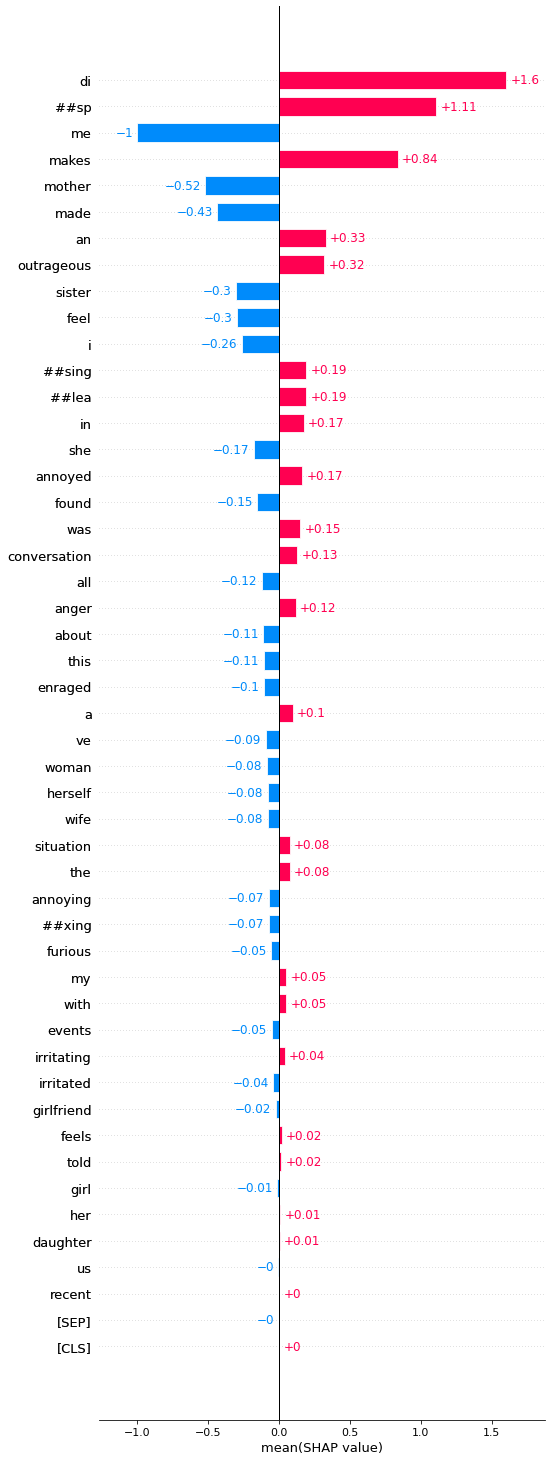

In [ ]:
shap.plots.bar(shap_values[:,:, 0].mean(0), max_display=50)

#Masculine Anger

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in mas]
mas=[i.lower() for i in mas]
mas=[i.strip() for i in mas]
explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])

Partition explainer: 281it [08:29,  1.81s/it]


In [ ]:
masc_dict=produce_explanation_features(mas[:], 0)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'he', 'feels', 'anger', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
49
49
{'di': 1.6224026273176972, '##sp': 1.1319092335732073, 'makes': 0.8202287288390748, 'outrageous': 0.28345519311982653, 'was': 0.23552259220166727, 'son': 0.2099326332982936, '##lea': 0.2077007610411035, '##sing': 0.2077007610411035, 'an': 0.18870402331134803, 'father': 0.16882941438626056, 'annoyed': 0.15513083371101968, 'conversation': 0.12837393581603415, 'my': 0.11099516601829845, 'in': 0.09360443726090387, 'him': 0.07474763673098729, 'the': 0.06756031184679537, 'anger': 0.06344727648441613, 'boyfriend': 0.058968924765889226, 

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


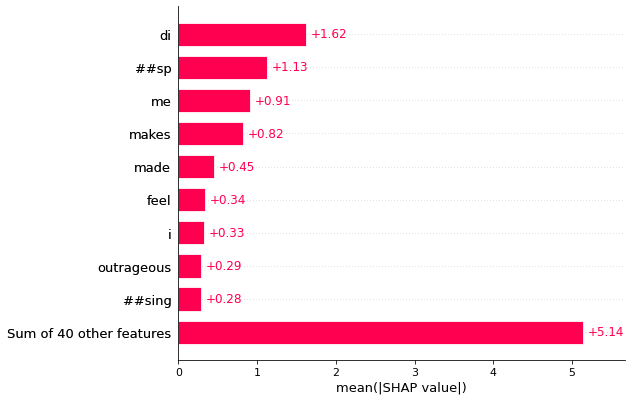

In [ ]:
shap.plots.bar(shap_values[:,:,0])

#Neutral Anger

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in neu]
neu=[i.lower() for i in neu]
neu=[i.strip() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

Partition explainer: 281it [08:27,  1.81s/it]


In [ ]:
neu_dict=produce_explanation_features(neu[:], 0)

['[CLS]', 'sep', 'they', 'feel', 'anger', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
48
48
{'di': 1.6593123526670759, '##sp': 1.164476697690021, 'makes': 0.8100487761662588, 'an': 0.38435853474956944, 'outrageous': 0.2652698890092861, '##lea': 0.2237404290824189, '##sing': 0.2237404290824189, 'in': 0.19153788403037456, 'annoyed': 0.17524803525083799, 'was': 0.15029290727391142, 'conversation': 0.13354997130049454, 'anger': 0.12984441461495896, 'a': 0.11487927750445802, 'my': 0.10676129428081543, 'situation': 0.09007564350281809, 'the': 0.08660614268969198, 'they': 0.08261203097391726, 'sibling': 0.07436339124988171, '

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


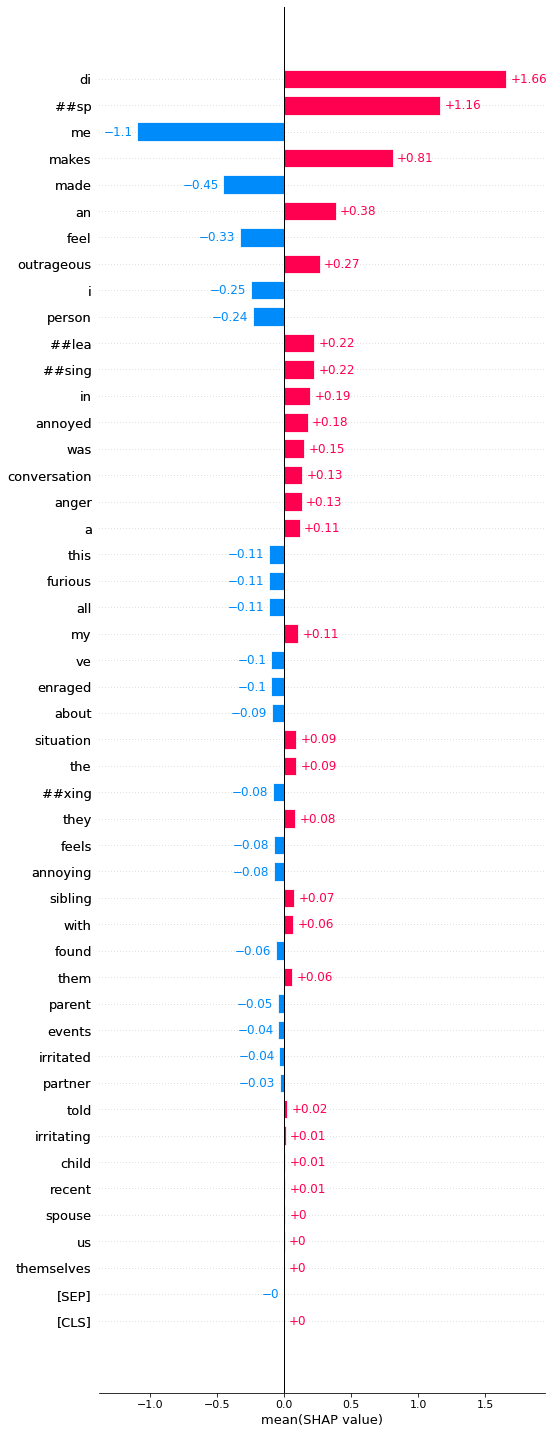

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

In [2]:
fe_dict={'di': 1.6022011022400087, '##sp': 1.1094975333573922, 'makes': 0.8362447935860129, 'an': 0.3287645888578414, 'outrageous': 0.31942955039981585, '##lea': 0.19226414978810483, '##sing': 0.19226414978810483, 'in': 0.1738251280963458, 'annoyed': 0.16526671786621638, 'was': 0.14928204825469032, 'conversation': 0.12978935105827732, 'anger': 0.1187861462613905, 'a': 0.09676804800359702, 'situation': 0.07639823496038692, 'the': 0.07538248656383191, 'my': 0.05057235083398331, 'with': 0.04843760636673331, 'irritating': 0.04049278513322609, 'feels': 0.01987462156679805, 'told': 0.016229381275510168, 'her': 0.006725789379514406, 'daughter': 0.005792060928293407, 'recent': 0.0005810364512949737, '[CLS]': 1.3790558598382525e-08, '[SEP]': -5.173982231136575e-08, 'us': -0.0026955296568347263, 'girl': -0.009861920657633472, 'girlfriend': -0.020347598682742336, 'irritated': -0.038882472548994435, 'events': -0.04817473855576739, 'furious': -0.054449220746574954, '##xing': -0.06882903572851125, 'annoying': -0.07169904412819678, 'wife': -0.07751765831825487, 'herself': -0.0791345165373897, 'woman': -0.08453839675995053, 've': -0.09250254138185342, 'enraged': -0.1044527787155062, 'this': -0.10545137420476045, 'about': -0.10836761988545256, 'all': -0.11880980141603499, 'found': -0.15202654568800805, 'she': -0.17341337330198675, 'i': -0.25939126867421525, 'feel': -0.2961836874673191, 'sister': -0.3003547562822458, 'made': -0.4334452107646711, 'mother': -0.5184965202208728, 'me': -0.9955902007256003}
mas_dict={'di': 1.6224026273176972, '##sp': 1.1319092335732073, 'makes': 0.8202287288390748, 'outrageous': 0.28345519311982653, 'was': 0.23552259220166727, 'son': 0.2099326332982936, '##lea': 0.2077007610411035, '##sing': 0.2077007610411035, 'an': 0.18870402331134803, 'father': 0.16882941438626056, 'annoyed': 0.15513083371101968, 'conversation': 0.12837393581603415, 'my': 0.11099516601829845, 'in': 0.09360443726090387, 'him': 0.07474763673098729, 'the': 0.06756031184679537, 'anger': 0.06344727648441613, 'boyfriend': 0.058968924765889226, 'with': 0.05551010403392599, 'a': 0.05454236571695839, 'himself': 0.039518110218853986, 'man': 0.03699981146326746, 'told': 0.036878912424112995, 'situation': 0.028513325305090785, 'us': 0.004747283722045276, 'recent': 0.004571958535984001, '[CLS]': 3.289109002912916e-08, '[SEP]': -6.628328294814539e-09, 'husband': -0.004834948003452368, 'events': -0.048737124758016934, 'irritating': -0.05024992976261523, 'he': -0.05573278928083336, 'found': -0.05924353916744248, 'this': -0.06212371792426679, 'irritated': -0.07170544875003183, 'boy': -0.07310294072274562, 'furious': -0.07890770710785569, 'feels': -0.09740486903065348, '##xing': -0.11516723163850441, 'about': -0.11780906217020135, 'enraged': -0.11853881857197644, 'annoying': -0.1211479666128709, 've': -0.12650454088980925, 'all': -0.1335855847493616, 'brother': -0.1413519198476538, 'feel': -0.3237726350721219, 'i': -0.3260112328911202, 'made': -0.4487120727239411, 'me': -0.9062408566806276}
neu_dict={'di': 1.6593123526670759, '##sp': 1.164476697690021, 'makes': 0.8100487761662588, 'an': 0.38435853474956944, 'outrageous': 0.2652698890092861, '##lea': 0.2237404290824189, '##sing': 0.2237404290824189, 'in': 0.19153788403037456, 'annoyed': 0.17524803525083799, 'was': 0.15029290727391142, 'conversation': 0.13354997130049454, 'anger': 0.12984441461495896, 'a': 0.11487927750445802, 'my': 0.10676129428081543, 'situation': 0.09007564350281809, 'the': 0.08660614268969198, 'they': 0.08261203097391726, 'sibling': 0.07436339124988171, 'with': 0.0643162218514014, 'them': 0.06039012464265749, 'told': 0.02173716311901758, 'irritating': 0.010899391670306726, 'child': 0.009795842663518056, 'recent': 0.007392054131840786, 'spouse': 0.004897386736964626, 'us': 0.003541238227656879, 'themselves': 0.002114150486737334, '[CLS]': 1.5231839554471554e-08, '[SEP]': -3.4353391270434564e-08, 'partner': -0.03456064294022898, 'irritated': -0.03569607513350009, 'events': -0.043590711211056024, 'parent': -0.04595330507065232, 'found': -0.061852097748870946, 'annoying': -0.07613113737004146, 'feels': -0.07932495177672858, '##xing': -0.08347431567549984, 'about': -0.09394036474880023, 'enraged': -0.09505175877214753, 've': -0.10027427897010711, 'all': -0.11136855471548539, 'furious': -0.11243399889797845, 'this': -0.11392814980579691, 'person': -0.23622777461425173, 'i': -0.24871842279485304, 'feel': -0.3284657596705076, 'made': -0.454996723140684, 'me': -1.0956065668407018}

#Joy (Negative)

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[1]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in fe]
fe=[i.lower() for i in fe]
fe=[i.strip() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])

In [ ]:
fe_dict=produce_explanation_features(fe[:], 0)

['[CLS]', 'sep', 'she', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'feels': 2.074663368014148, 'relieved': 1.1424363257415386, 'was': 0.27072361232117453, 'mother': 0.18244856667407236, 'situation': 0.17969942808268452, 'girlfriend': 0.16310938961330423, '[SEP]': -1.615775849798543e-07, '[CLS]': -1.7134415131711743e-07, 'found': -0.10254761725123077, 'woman': -0.11039923175321889, 'herself': -0.11665290497350797, 'feel': -0.13073149576951132, 'in': -0.18610049891166938, 'wife': -0.19796992490480889, 'a': -0.24474424731811084, 'the': -0.27135614753518345, 'my': -0.33147531773564903, 'girl': -0.3561318898473929, 'told': 

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in mas]
mas=[i.lower() for i in mas]
mas=[i.strip() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])


In [ ]:
masc_dict=produce_explanation_features(mas[:], 0)

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in neu]
neu=[i.lower() for i in neu]
neu=[i.strip() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

In [ ]:
neu_dict=produce_explanation_features(neu[:], 0)

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

#Joy (Positive)

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[1]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in fe]
fe=[i.lower() for i in fe]
fe=[i.strip() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])

Partition explainer: 281it [08:22,  1.79s/it]


In [ ]:
fe_dict=produce_explanation_features(fe[:], 2)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'she', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'me': 0.8574203094378177, 'mother': 0.5365497236677144, 'made': 0.33180387981792514, 'i': 0.3101139305793227, 'relieved': 0.15357177765518099, 'feel': 0.11518727011261744, 'wonderful': 0.08210145091381159, 'great': 0.08125267230554768, 'she': 0.0771050919755682, '##static': 0.0613168208136461, 'wife': 0.04334878609600829, 'amazing': 0.03673488193546492, 'us': 0.03150844202265676, 'told': 0.026007404861380888, 'found': 0.01623671338659958, 'girl': 0.014035196882988635, 'daughter': 0.00827492205829861, 'sister': 0.00012899821838321073, '[SEP]': 1.11984900

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


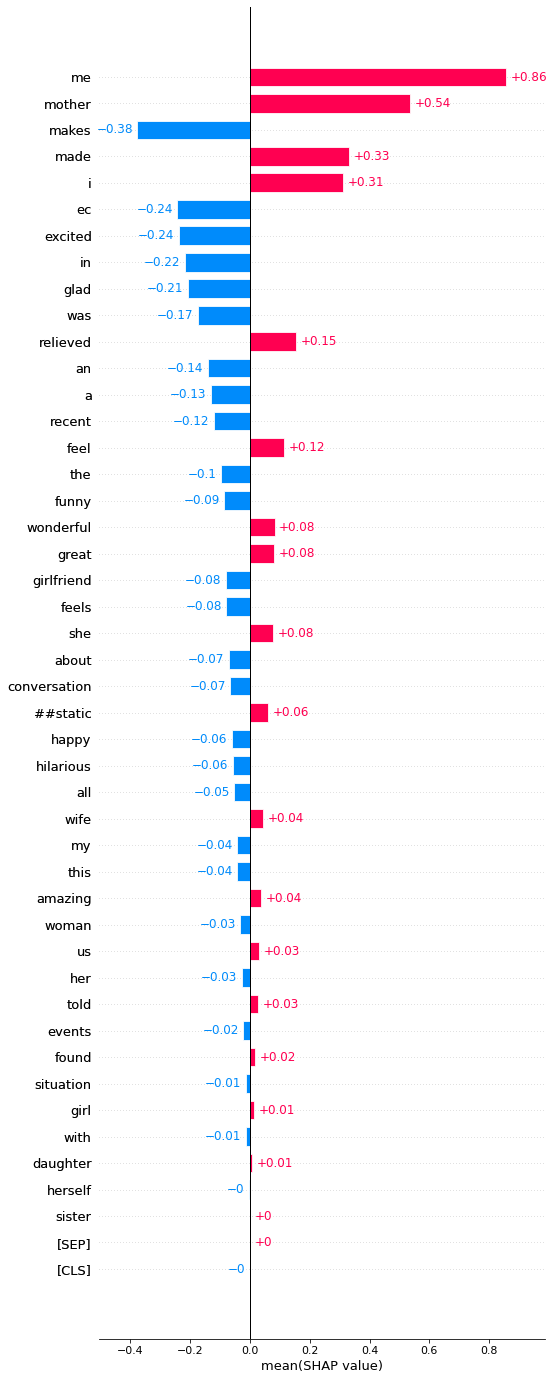

In [ ]:
shap.plots.bar(shap_values[:,:,2].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in mas]
mas=[i.lower() for i in mas]
mas=[i.strip() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])

Partition explainer: 281it [08:23,  1.79s/it]


In [ ]:
masc_dict=produce_explanation_features(mas[:], 2)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'he', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'me': 0.8276261878066263, 'made': 0.3700562557656531, 'i': 0.3377924338280849, 'relieved': 0.19459688031497135, 'great': 0.1606929504134871, 'wonderful': 0.13393044353948172, 'feel': 0.11536864318207864, '##static': 0.10755185648065019, 'he': 0.10332991318182949, 'amazing': 0.09677931247223139, 'man': 0.09497272992460633, 'boy': 0.044184040028469, 'found': 0.039249278352072536, 'this': 0.028765913855927774, 'us': 0.015961117355629724, 'him': 0.009298258905615182, 'situation': 0.001352740260696651, '[SEP]': 1.2464431769958553e-07, '[CLS]': -6.66414938795238e-0

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


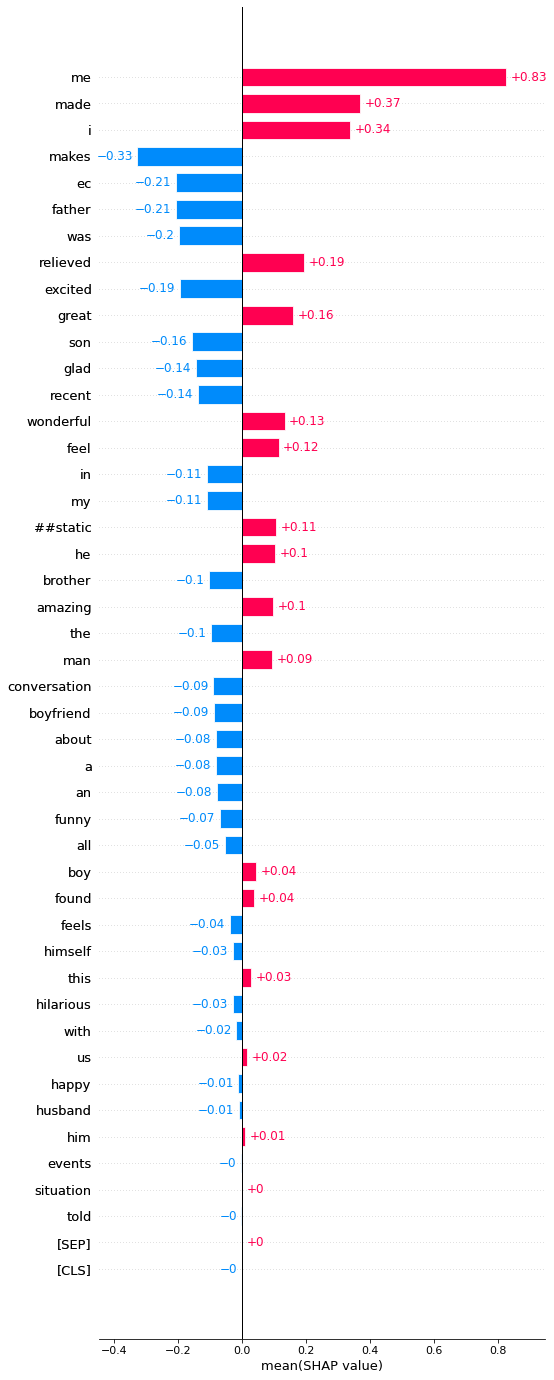

In [ ]:
shap.plots.bar(shap_values[:,:,2].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in neu]
neu=[i.lower() for i in neu]
neu=[i.strip() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

Partition explainer: 281it [08:17,  1.77s/it]


In [ ]:
neu_dict=produce_explanation_features(neu[:],  2)

['[CLS]', 'sep', 'they', 'feel', 'ec', '##static', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
45
45
{'me': 1.0039454313344125, 'made': 0.36824947225953003, 'i': 0.3078812334588395, 'relieved': 0.18120087935498386, '##static': 0.11645421694321367, 'wonderful': 0.11326973326962915, 'feel': 0.1088459193556975, 'great': 0.10865863457123746, 'person': 0.060953700228218645, 'amazing': 0.056352597782292825, 'them': 0.04090830812410609, 'found': 0.025737204639262178, 'us': 0.007116604565506071, 'this': 0.006048615252064077, 'themselves': 0.0022414937062815838, 'with': 0.0005912199066354651, '[SEP]': 1.3963003266977732e-07, '[CLS]': -5.481993759183215e-08, 'situatio

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


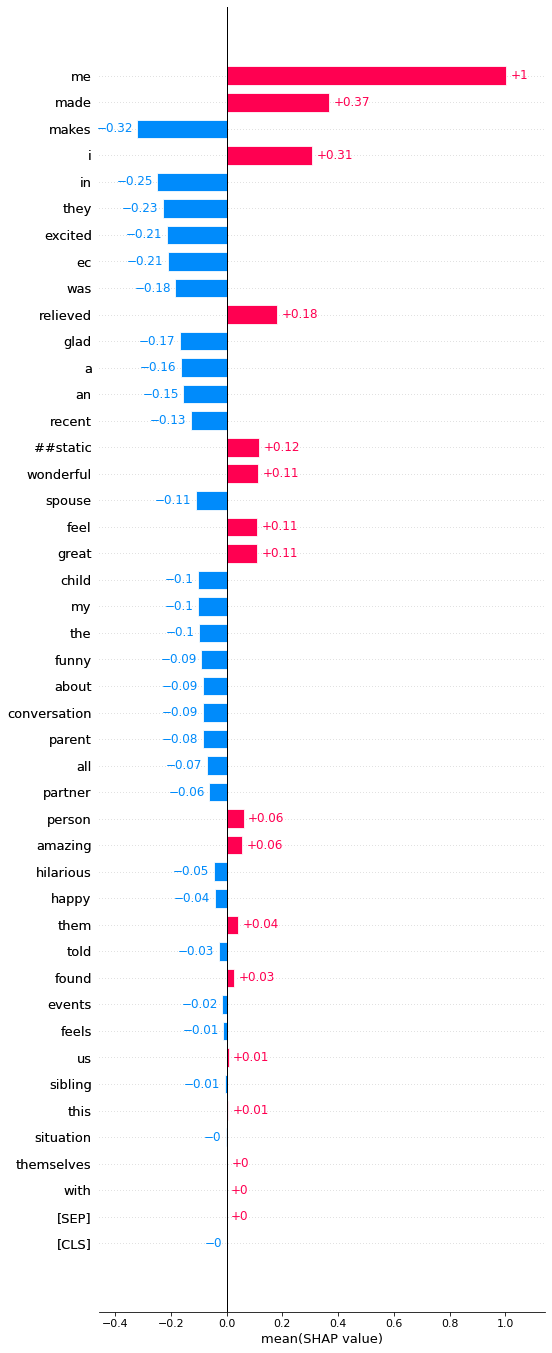

In [ ]:
shap.plots.bar(shap_values[:,:,2].mean(0), max_display=50)

#Fear

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[2]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in fe]
fe=[i.lower() for i in fe]
fe=[i.strip() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])

Partition explainer: 281it [08:16,  1.77s/it]


In [ ]:
fe_dict=produce_explanation_features(fe[:], 0)

['[CLS]', 'sep', 'she', 'feels', 'anxious', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
44
44
{'makes': 0.8410179271917265, 'in': 0.27949695565953725, 'a': 0.20657017189719742, 'was': 0.20288187979766628, 'conversation': 0.13199881183252526, 'discouraged': 0.11649241398401146, 'fearful': 0.07354313850521049, 'dreadful': 0.06840293646817204, 'the': 0.05991970398759514, 'threatening': 0.05771939029467821, 'my': 0.05671373040256575, 'with': 0.056113079776686656, 'feels': 0.039154683337748034, 'situation': 0.037664197159041325, 'us': 0.020863900920404646, 'told': 0.020703369806458326, 'her': 0.016672491463295806, '[CLS]': 3.833640703845842e-08,

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


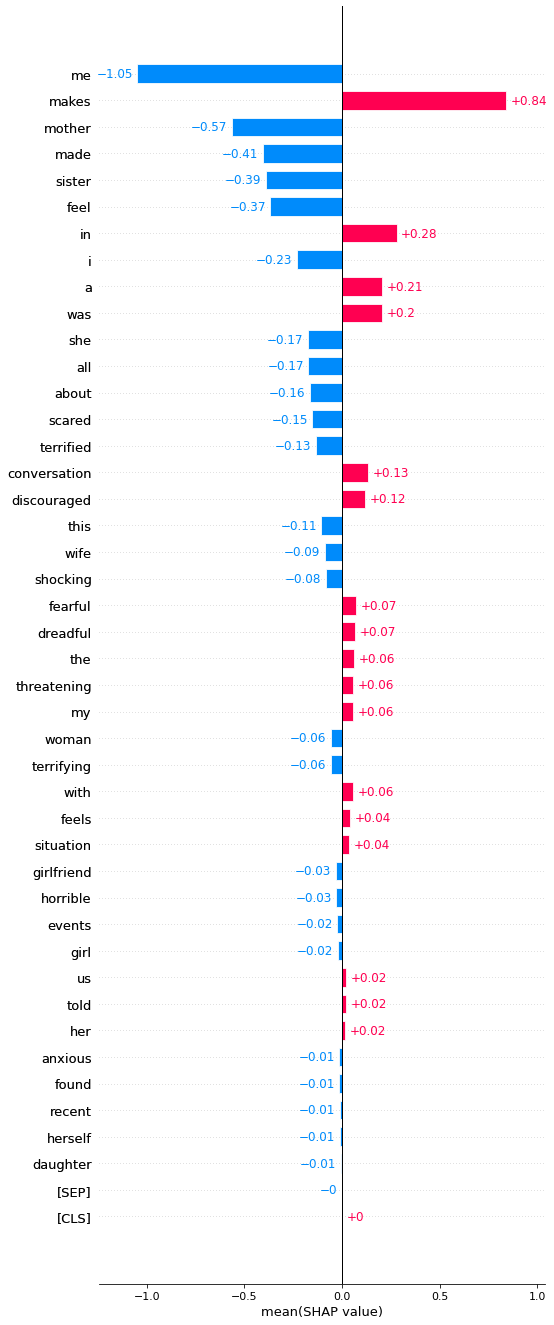

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in mas]
mas=[i.lower() for i in mas]
mas=[i.strip() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])

Partition explainer: 281it [08:09,  1.74s/it]


In [ ]:
masc_dict=produce_explanation_features(mas[:], 0)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'he', 'feels', 'anxious', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
44
44
{'makes': 0.8571529721252802, 'was': 0.23081669704181276, 'son': 0.20021339345936712, 'conversation': 0.1450860227977022, 'my': 0.11933625504192802, 'himself': 0.11591258929287558, 'father': 0.10781263470924109, 'told': 0.0630255835723561, 'the': 0.062108369767745024, 'in': 0.06201989045751203, 'a': 0.06177546938869642, 'him': 0.06124451264397796, 'discouraged': 0.048539811747603016, 'with': 0.04747106358373304, 'man': 0.04061951857956155, 'fearful': 0.03877682061132011, 'boyfriend': 0.03163471186807309, 'found': 0.030355294518161446, 'dreadful': 0.02719

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


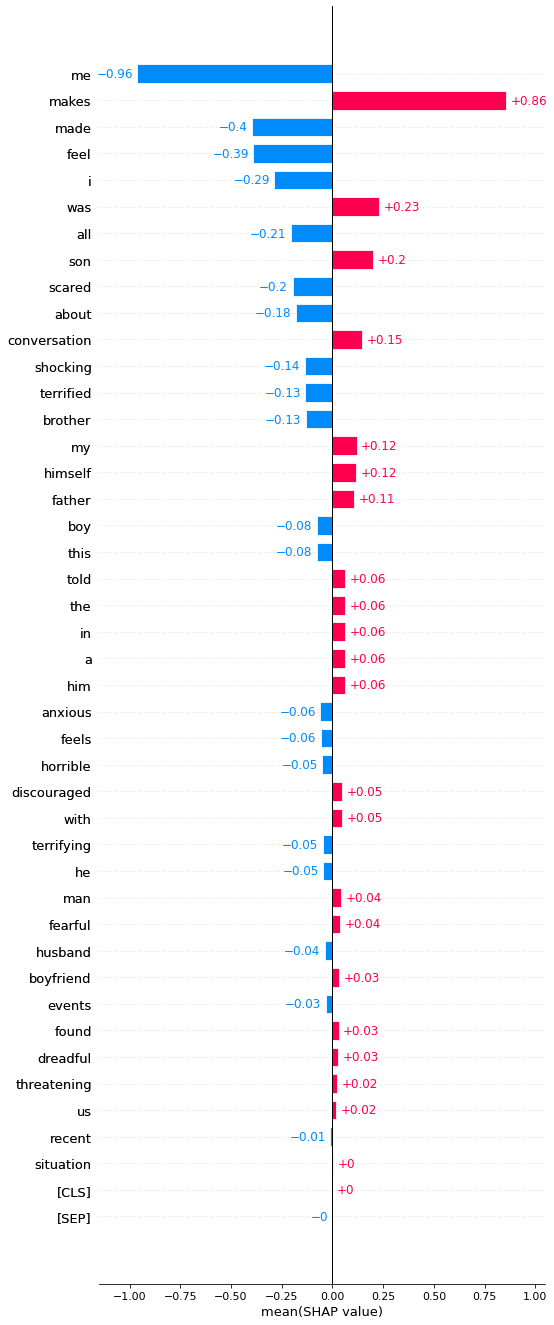

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in neu]
neu=[i.lower() for i in neu]
neu=[i.strip() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

Partition explainer: 281it [08:08,  1.74s/it]


In [ ]:
neu_dict=produce_explanation_features(neu[:], 0)

['[CLS]', 'sep', 'they', 'feel', 'anxious', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
43
43
{'makes': 0.8255425388400702, 'in': 0.2765896149740909, 'a': 0.1811916783511426, 'was': 0.162016873441226, 'conversation': 0.15751470606107104, 'my': 0.12081392352828686, 'discouraged': 0.10016047005155, 'fearful': 0.09054986862420843, 'the': 0.07470923270524839, 'sibling': 0.062204512332630926, 'situation': 0.049052949514495965, 'dreadful': 0.048113671253484834, 'with': 0.04701263848471809, 'threatening': 0.04696960656530702, 'they': 0.04156978220110188, 'told': 0.03413578326074361, 'us': 0.01992467275594374, 'them': 0.018334521473971743, 'child': 0.01

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


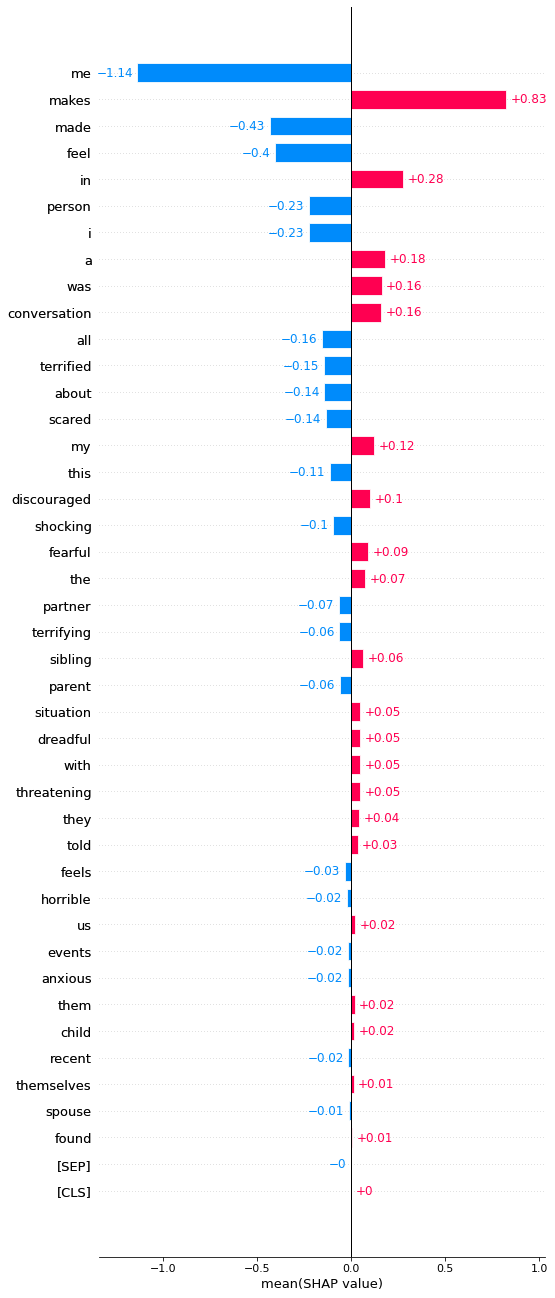

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

In [11]:
#Fear
fe_dict={'makes': 0.8410179271917265, 'in': 0.27949695565953725, 'a': 0.20657017189719742, 'was': 0.20288187979766628, 'conversation': 0.13199881183252526, 'discouraged': 0.11649241398401146, 'fearful': 0.07354313850521049, 'dreadful': 0.06840293646817204, 'the': 0.05991970398759514, 'threatening': 0.05771939029467821, 'my': 0.05671373040256575, 'with': 0.056113079776686656, 'feels': 0.039154683337748034, 'situation': 0.037664197159041325, 'us': 0.020863900920404646, 'told': 0.020703369806458326, 'her': 0.016672491463295806, '[CLS]': 3.833640703845842e-08, '[SEP]': -4.78550414448331e-08, 'daughter': -0.007868401297281016, 'herself': -0.01024785149887548, 'recent': -0.01285497890839612, 'found': -0.014302636861540532, 'anxious': -0.014538236202858356, 'girl': -0.02122515665742291, 'events': -0.024438160280468225, 'horrible': -0.02948959911947463, 'girlfriend': -0.0316501561214502, 'terrifying': -0.05646639928994945, 'woman': -0.056673674463690205, 'shocking': -0.08455290419240998, 'wife': -0.08800011264311726, 'this': -0.10599256687532899, 'terrified': -0.13242372732658902, 'scared': -0.1530100444415647, 'about': -0.16390327553541656, 'all': -0.17274977679160086, 'she': -0.17393235774899563, 'i': -0.23322109749014422, 'feel': -0.3665292158173533, 'sister': -0.38833445650041987, 'made': -0.40659066694624535, 'mother': -0.5655678163259811, 'me': -1.0476838964219533}
mas_dict={'makes': 0.8571529721252802, 'was': 0.23081669704181276, 'son': 0.20021339345936712, 'conversation': 0.1450860227977022, 'my': 0.11933625504192802, 'himself': 0.11591258929287558, 'father': 0.10781263470924109, 'told': 0.0630255835723561, 'the': 0.062108369767745024, 'in': 0.06201989045751203, 'a': 0.06177546938869642, 'him': 0.06124451264397796, 'discouraged': 0.048539811747603016, 'with': 0.04747106358373304, 'man': 0.04061951857956155, 'fearful': 0.03877682061132011, 'boyfriend': 0.03163471186807309, 'found': 0.030355294518161446, 'dreadful': 0.027192239996060297, 'threatening': 0.021710835659112915, 'us': 0.016823604912435914, 'situation': 0.002093094659442682, '[CLS]': 4.4643616519342485e-08, '[SEP]': -1.7523519316561422e-08, 'recent': -0.01062767982728439, 'events': -0.03150908404357057, 'husband': -0.036705773220270466, 'he': -0.04519927549171353, 'terrifying': -0.04707898875536689, 'horrible': -0.04989470944198513, 'feels': -0.056730038347571024, 'anxious': -0.059571080759382666, 'this': -0.07610747349050884, 'boy': -0.0786560284265158, 'brother': -0.13270793510998852, 'terrified': -0.13353759219379022, 'shocking': -0.1373859803726993, 'about': -0.18070588357344772, 'scared': -0.19700569475748309, 'all': -0.20658665552080074, 'i': -0.28664376360384897, 'feel': -0.39007332187671473, 'made': -0.3981671307180414, 'me': -0.9614207301262179}
neu_dict={'makes': 0.8255425388400702, 'in': 0.2765896149740909, 'a': 0.1811916783511426, 'was': 0.162016873441226, 'conversation': 0.15751470606107104, 'my': 0.12081392352828686, 'discouraged': 0.10016047005155, 'fearful': 0.09054986862420843, 'the': 0.07470923270524839, 'sibling': 0.062204512332630926, 'situation': 0.049052949514495965, 'dreadful': 0.048113671253484834, 'with': 0.04701263848471809, 'threatening': 0.04696960656530702, 'they': 0.04156978220110188, 'told': 0.03413578326074361, 'us': 0.01992467275594374, 'them': 0.018334521473971743, 'child': 0.01663513399921807, 'themselves': 0.01316105600427923, 'found': 0.005343340318606772, '[CLS]': 4.7020634311267e-08, '[SEP]': -6.699244795214745e-08, 'spouse': -0.012646087871738996, 'recent': -0.0159754252800044, 'anxious': -0.018897859993908923, 'events': -0.018921549258323216, 'horrible': -0.024190635037837516, 'feels': -0.03330635138831221, 'parent': -0.06179748881200047, 'terrifying': -0.0634190633889683, 'partner': -0.06752332611284768, 'shocking': -0.09603322617864496, 'this': -0.11237166892297866, 'scared': -0.13525131314303893, 'about': -0.1427861519568447, 'terrified': -0.14550191151978303, 'all': -0.15532022341554977, 'i': -0.22547808664109398, 'person': -0.2265281411897741, 'feel': -0.4040467897122716, 'made': -0.4335420666389411, 'me': -1.137314947754474}

mean=0
for i in feminine:
  print(i, ' ', fe_dict[i])
  mean+=fe_dict[i]
print("MEAN: ", mean/len(fe_dict) ,'\n')
mean=0
for i in masculine:
  print(i, ' ', mas_dict[i])
  mean+=mas_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')
mean=0
for i in neutral:
  print(i, ' ', neu_dict[i])
  mean+=neu_dict[i]
print("MEAN: ", mean/len(neu_dict) ,'\n')

she   -0.17393235774899563
woman   -0.056673674463690205
girl   -0.02122515665742291
sister   -0.38833445650041987
daughter   -0.007868401297281016
wife   -0.08800011264311726
girlfriend   -0.0316501561214502
mother   -0.5655678163259811
her   0.016672491463295806
MEAN:  -0.029922264552160512 

he   -0.04519927549171353
man   0.04061951857956155
boy   -0.0786560284265158
brother   -0.13270793510998852
son   0.20021339345936712
husband   -0.036705773220270466
boyfriend   0.03163471186807309
father   0.10781263470924109
him   0.06124451264397796
MEAN:  0.003447808349110058 

they   0.04156978220110188
person   -0.2265281411897741
child   0.01663513399921807
child   0.01663513399921807
sibling   0.062204512332630926
spouse   -0.012646087871738996
partner   -0.06752332611284768
parent   -0.06179748881200047
them   0.018334521473971743
MEAN:  -0.004956185115819084 



#Sad

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[3]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in fe]
fe=[i.lower() for i in fe]
fe=[i.strip() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])

Partition explainer: 281it [08:25,  1.80s/it]


In [ ]:
fe_dict=produce_explanation_features(fe[:], 0)

['[CLS]', 'sep', 'she', 'feels', 'depressed', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
47
47
{'makes': 0.8183575583431206, 'devastated': 0.41271000229966076, 'in': 0.1916620487945407, 'conversation': 0.16511569473602758, 'a': 0.13343289763749477, 'miserable': 0.12401909537855982, 'was': 0.12185089775758254, 'the': 0.0722338481148272, 'with': 0.05415590475430192, 'my': 0.05071882928606818, 'situation': 0.04773982719526426, 'de': 0.04126084264733302, 'sad': 0.03325728386446266, '##pressing': 0.031564525365904005, 'told': 0.02984353559853209, 'us': 0.01798741982163529, 'her': 0.015907944264358192, 'gloom': 0.01393141070269255,

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


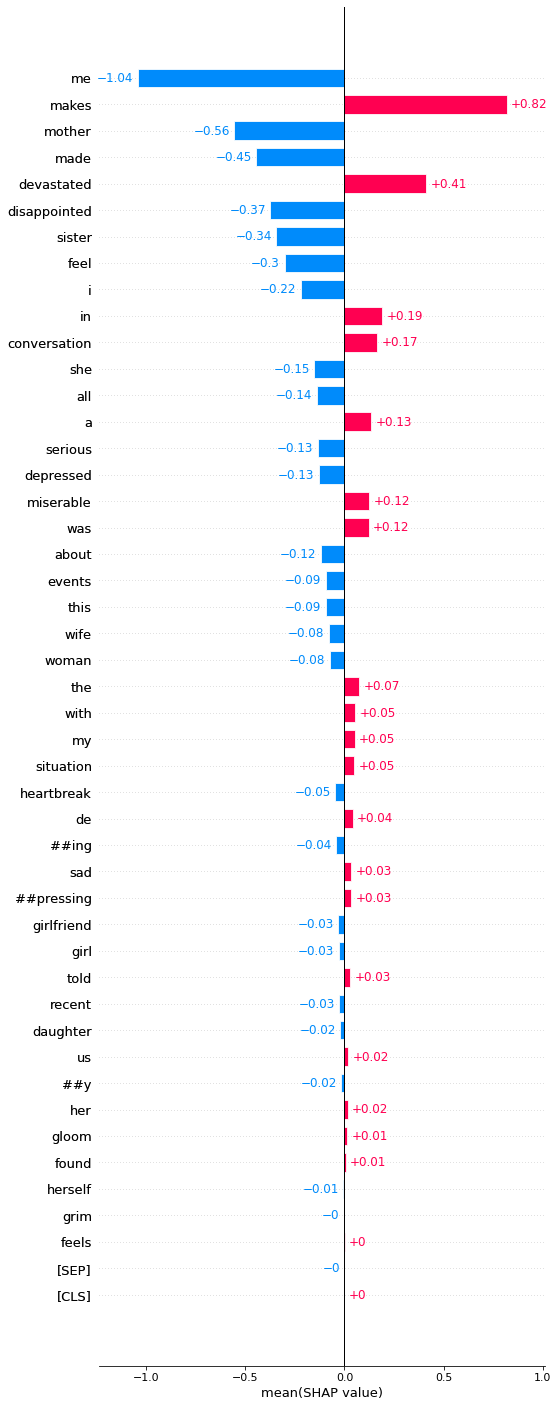

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in mas]
mas=[i.lower() for i in mas]
mas=[i.strip() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])

Partition explainer: 281it [08:22,  1.79s/it]


In [ ]:
masc_dict=produce_explanation_features(mas[:], 0)

['[CLS]', 'sep', 'he', 'feels', 'depressed', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
47
47
{'makes': 0.8140821505954386, 'devastated': 0.46979914611267665, 'son': 0.21078886717627965, 'was': 0.19826062624413035, 'conversation': 0.16128477372796582, 'my': 0.11384661087081335, 'father': 0.10297492452846022, 'miserable': 0.08703907490424082, 'himself': 0.07082175980311904, 'boyfriend': 0.0666043015725526, 'the': 0.0644874681140239, 'with': 0.05414733655039757, 'told': 0.049679515002495504, 'him': 0.04831121535314935, 'found': 0.041623311854280164, 'us': 0.03031240966114243, 'in': 0.028226981859011645, 'de': 0.024781002606922686, '

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


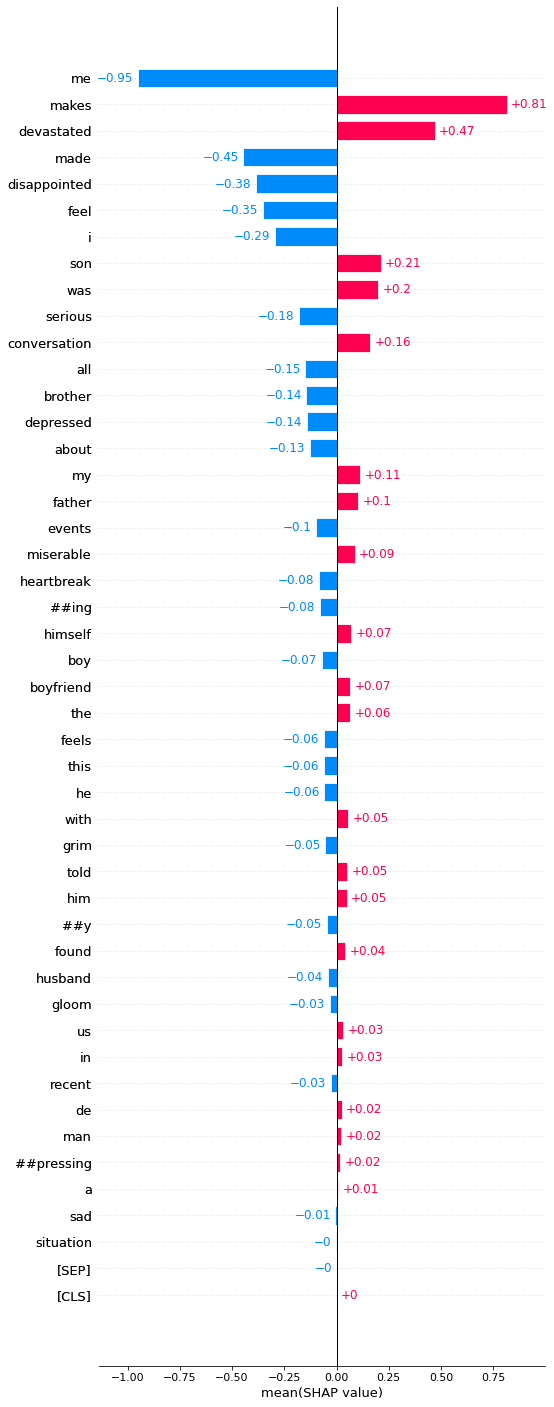

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

Neutral


In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation and x!='\n') for par in neu]
neu=[i.lower() for i in neu]
neu=[i.strip() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

Partition explainer: 281it [08:23,  1.79s/it]


In [ ]:
neu_dict=produce_explanation_features(neu[:], 0)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'they', 'feel', 'depressed', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'makes': 0.7802495493200257, 'devastated': 0.37396827547081557, 'in': 0.18943353883488837, 'conversation': 0.15861419736094295, 'was': 0.13155017786898188, 'a': 0.13030997311229736, 'miserable': 0.12930028899694068, 'my': 0.11106728313978506, 'the': 0.08085983080845054, 'de': 0.06400151548782973, 'they': 0.05956399527692283, 'with': 0.0516571931881414, 'them': 0.05052147818119366, 'sibling': 0.05016421027977072, 'situation': 0.049437917682472604, '##pressing': 0.0434629924696243, 'told': 0.035019733487445914, 'themselves': 0.02141797980

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


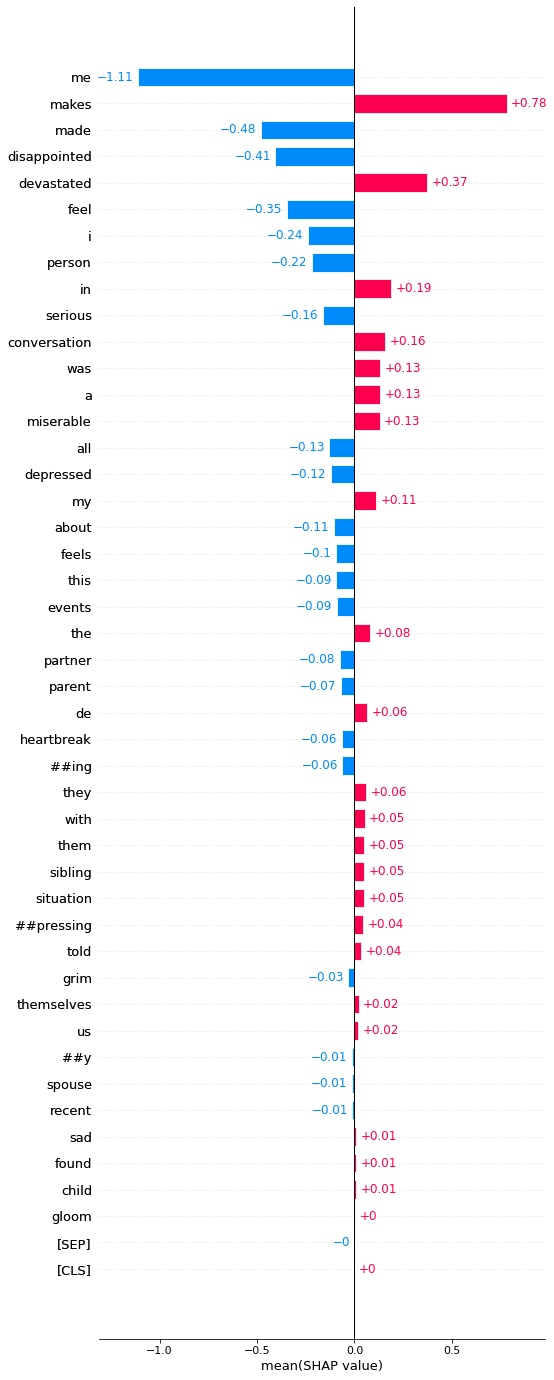

In [ ]:
shap.plots.bar(shap_values[:,:,0].mean(0), max_display=50)

#Work

SHAP allows us to identify the contribute of each feature in the input to the prediction by calculating the Shapely value of each feature, calculated with the following equation. 


This would involve calculating the marginal contribution of every feature, by considering all possible permutations (which totals to N! permutations, where N denotes the number of features). We take into consideration the mean of the contributions of all features in order to estimate it's aggregate contribution to the prediction of a particular class. In other words, we could say that the Shapely value is an indicator of how much weight a particular feature carries, which is also the difference between the actual prediction and the base prediction measured by the classifier.